In [ ]:
pip install scrapy

import scrapy
from datetime import datetime
from numpy import genfromtxt
from matplotlib import pyplot as plt
import numpy as np

In [1]:
import scrapy
from datetime import datetime

class BrickSetScraper(scrapy.Spider):
    name = 'brickset_spider'
    start_urls = []

    ANNEE_DEBUT = 2012
    ANNEE_FIN = 2013

# Création de la boucle qui permettra d'évaluer chaque année

    for annee in range(ANNEE_DEBUT, ANNEE_FIN+1):
        start_urls.append("https://brickset.com/sets/year-"+str(annee)+"/filter-wasavailableeu")

# Création des selector qui vont permettre d'établir le chemin menant aux informations pertinentes

    def parse(self, response):
        SET_SELECTOR = '.set'
        NAME_SELECTOR = 'h1 ::text'
        TAG_SELECTOR = 'div.tags ::text'
        PIECES_SELECTOR = './/dl[dt/text() = "Pieces"]/dd/a/text()'
        MINIFIGS_SELECTOR = './/dl[dt/text() = "Minifigs"]/dd[2]/a/text()'
        CURRENT_VALUE_SELECTOR = './/dl[dt/text() = "Value used"]/dd[4]/a/text()'
        CURRENT_VALUE_SELECTOR2 = './/dl[dt/text() = "Value new"]/dd[3]/a/text()'
        RRP_SELECTOR = './/dl[dt/text() = "PPP"]/dd/text()'
        RRP_SELECTOR2= 'div.col ::text'

# On applique désormais les selector établi ci-dessus afin de compléter le jeu de données

        for brickset in response.css(SET_SELECTOR):
            yield {
                'nom': brickset.css(NAME_SELECTOR).extract_first(),
                'numero': brickset.css(TAG_SELECTOR).extract_first(),
                'tag1': brickset.css(TAG_SELECTOR).extract()[2],
                'tag2': brickset.css(TAG_SELECTOR).extract()[4],
                'tag3': brickset.css(TAG_SELECTOR).extract()[6],
                'pieces': brickset.xpath(PIECES_SELECTOR).extract_first(),
                'minifigs': brickset.xpath(MINIFIGS_SELECTOR).extract_first(),
                'Value used': brickset.xpath(CURRENT_VALUE_SELECTOR).extract_first(), #prix d'achat utilisé du set aujourd'hui
                'Value new': brickset.xpath(CURRENT_VALUE_SELECTOR2).extract_first(), #prix d'achat neuf du set aujourd'hui
                #'Prix initial': brickset.xpath(RRP_SELECTOR).extract_first(),
                'Prix initial2': brickset.css(RRP_SELECTOR2).extract(),
            }

# Création d'un selector permettant d'étudier toutes les pages de l'année en question

        PROCHAINE_PAGE_SELECTOR = '.next a ::attr(href)'
        prochaine_page = response.css(PROCHAINE_PAGE_SELECTOR).extract_first()

        if prochaine_page:
            yield scrapy.Request(
                response.urljoin(prochaine_page),
                callback=self.parse
            )

In [ ]:
from scrapy.crawler import CrawlerProcess
process = CrawlerProcess({
    'FEED_URI': 'lego.pickle',
    'FEED_FORMAT': 'pickle'
})

process.crawl(BrickSetScraper)
process.start()

In [ ]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


data = pd.DataFrame({'json':[{'a': 'x', 'b': 'y', 'c': 'z'},[{'a': 'x', 'b': 'y', 'c': 'z'}, {'a': 'd', 'b': 'e', 'c': 'f'}]]})

dflist = []
for index, row in data.iterrows():
    norm = json_normalize(data['json'][index])
    dflist.append(norm)

grouped = pd.concat(dflist, keys = np.arange(len(dflist)))

df2 = grouped.reset_index()

df2 = df2.pivot('level_0','level_1')

df2.index.name = None
df2.columns.names = [None, None]
df2.columns = df2.columns.map('{0[0]}_{0[1]}'.format)

In [6]:
data = np.load('/content/lego.pickle', allow_pickle=True)

In [240]:
import pandas as pd

df = pd.read_csv('lego.csv')
dd = np.array(df)
dff = pd.DataFrame(dd)

In [241]:
def Convert(string):
    li = list(string.split(","))
    return li

for i in range(n):
  dff[9][i] = Convert(dff[9][i])

In [242]:
n,m = np.shape(dff)
for i in range(n):
  for j in range(len(dff[9][i])):
    if dff[9][i][j] == 'Value new':
      dff[8][i]=dff[9][i][j+1]
    if dff[9][i][j] == 'Value used':
      dff[7][i]=dff[9][i][j+1]
    if dff[9][i][j] == 'RRP':
      temp = j+1
  dff[9][i] = dff[9][i][temp]

dff_temp = dff.copy()

In [243]:
for i in range(n):
  if type(dff[7][i]) == type('a'):
    dff[7][i] = float(dff[7][i].strip("~$"))
  if type(dff[8][i]) == type('a'):
    dff[8][i] = float(dff[8][i].strip("~$"))
  if "|" in dff[9][i]:
    dff[9][i] = float(dff[9][i][1:-3].strip("~$"))
  elif "$" in dff[9][i]:
    dff[9][i] = float(dff[9][i].strip("~$"))

In [246]:
df_temp = dff.copy()

In [281]:
dff = df_temp.copy()

In [282]:
for i in range(n):
  if dff[1][i] == dff[4][i]:
    dff[4][i] = dff[3][i]
    dff[3][i] = np.nan

In [268]:
dff['Année'] = dff[4].copy()

In [284]:
dff

,0,1,2,3,4,5,6,7,8,9,Nom du set,Numéro du set,Thème,Sous-thème,Année,Pièces,Nombre de minifigurines,Valeur neuve,Valeur occasion,Prix originel
0,Palace Cinema,10232-1,Creator Expert,Modular Buildings Collection,2013,2196,6.0,255.29,307.69,149.99,Palace Cinema,10232-1,Creator Expert,Modular Buildings Collection,2013,2196,6.0,255.29,307.69,149.99
1,Horizon Express,10233-1,Creator Expert,Trains,2013,1351,6.0,232.86,263.15,129.99,Horizon Express,10233-1,Creator Expert,Trains,2013,1351,6.0,232.86,263.15,129.99
2,City Park Cafe,3061-1,Friends,Heartlake City,2012,222,2.0,16.87,30.0,34.99,City Park Cafe,3061-1,Friends,Heartlake City,2012,222,2.0,16.87,30.0,34.99
3,Sydney Opera House,10234-1,Creator Expert,Landmarks,2013,2989,NaN,182.02,356.57,319.99,Sydney Opera House,10234-1,Creator Expert,Landmarks,2013,2989,NaN,182.02,356.57,319.99
4,Heartlake Flying Club,3063-1,Friends,General,2012,195,1.0,6.72,23.09,19.99,Heartlake Flying Club,3063-1,Friends,General,2012,195,1.0,6.72,23.09,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Creative Cakes,6785-1,Duplo,NaN,2012,55,NaN,31.94,33.18,24.99,Creative Cakes,6785-1,Duplo,NaN,2012,55,NaN,31.94,33.18,24.99
246,The Dynamic Duo Funhouse Escape,6857-1,DC Comics Super Heroes,Batman,2012,380,5.0,53.71,66.06,39.99,The Dynamic Duo Funhouse Escape,6857-1,DC Comics Super Heroes,Batman,2012,380,5.0,53.71,66.06,39.99
247,Catwoman Catcycle City Chase,6858-1,DC Comics Super Heroes,Batman,2012,89,2.0,10.04,18.87,12.99,Catwoman Catcycle City Chase,6858-1,DC Comics Super Heroes,Batman,2012,89,2.0,10.04,18.87,12.99
248,The Batcave,6860-1,DC Comics Super Heroes,Batman,2012,690,5.0,62.5,91.02,69.99,The Batcave,6860-1,DC Comics Super Heroes,Batman,2012,690,5.0,62.5,91.02,69.99


In [298]:
dff['Nom du set'] = dff[0]
dff['Numéro du set'] = dff[1]
dff['Thème'] = dff[2]
dff['Sous-thème'] = dff[3]
dff['Année'] = dff[4]
dff['Pièces'] = dff[5]
dff['Nombre de minifigurines'] = dff[6]
dff['Valeur neuve'] = dff[7]
dff['Valeur occasion'] = dff[8]
dff['Prix originel'] = dff[9]

df = dff.iloc[:, 10:]

In [302]:
dff['Pièces'].count()

250

Nous allons d'abord identifier le nombre de set par thème qui sont contenus dans notre base de donnée.

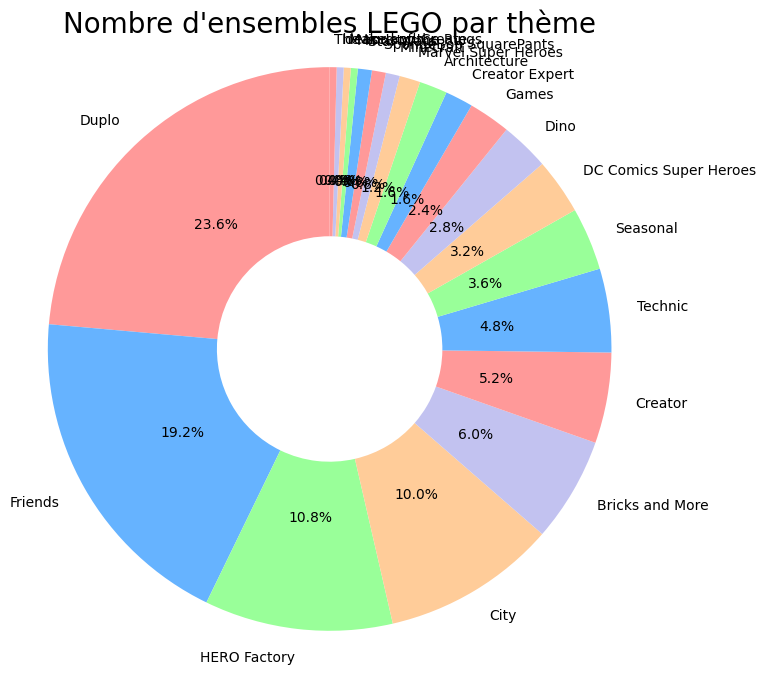

In [310]:
# Compte des ensembles par thème
theme_counts = df['Thème'].value_counts()
theme_counts_list = theme_counts.to_list()
theme_names = theme_counts.index.to_list()

# Définition des couleurs personnalisées
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Création du diagramme circulaire avec des couleurs et un formatage personnalisés
plt.figure(figsize=(8, 8))  # Définit la taille de la figure
plt.pie(theme_counts_list, labels=theme_names, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={'width': 0.6})
plt.title("Nombre d'ensembles LEGO par thème", fontsize=20)
plt.axis("equal")  # Un rapport d'aspect égal garantit un diagramme circulaire

# Ajout d'une ombre
plt.gca().set_aspect('equal')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white', zorder=-1))

# Affichage
plt.show()  # Affiche le diagramme circulaire

In [313]:
df

,Nom du set,Numéro du set,Thème,Sous-thème,Année,Pièces,Nombre de minifigurines,Valeur neuve,Valeur occasion,Prix originel
0,Palace Cinema,10232-1,Creator Expert,Modular Buildings Collection,2013,2196,6.0,255.29,307.69,149.99
1,Horizon Express,10233-1,Creator Expert,Trains,2013,1351,6.0,232.86,263.15,129.99
2,City Park Cafe,3061-1,Friends,Heartlake City,2012,222,2.0,16.87,30.0,34.99
3,Sydney Opera House,10234-1,Creator Expert,Landmarks,2013,2989,NaN,182.02,356.57,319.99
4,Heartlake Flying Club,3063-1,Friends,General,2012,195,1.0,6.72,23.09,19.99
...,...,...,...,...,...,...,...,...,...,...
245,Creative Cakes,6785-1,Duplo,NaN,2012,55,NaN,31.94,33.18,24.99
246,The Dynamic Duo Funhouse Escape,6857-1,DC Comics Super Heroes,Batman,2012,380,5.0,53.71,66.06,39.99
247,Catwoman Catcycle City Chase,6858-1,DC Comics Super Heroes,Batman,2012,89,2.0,10.04,18.87,12.99
248,The Batcave,6860-1,DC Comics Super Heroes,Batman,2012,690,5.0,62.5,91.02,69.99


In [321]:
df

,Nom du set,Numéro du set,Thème,Sous-thème,Année,Pièces,Nombre de minifigurines,Valeur neuve,Valeur occasion,Prix originel
0,Palace Cinema,10232-1,Creator Expert,Modular Buildings Collection,2013,2196,6.0,255.29,307.69,149.99
1,Horizon Express,10233-1,Creator Expert,Trains,2013,1351,6.0,232.86,263.15,129.99
2,City Park Cafe,3061-1,Friends,Heartlake City,2012,222,2.0,16.87,30.0,34.99
3,Sydney Opera House,10234-1,Creator Expert,Landmarks,2013,2989,NaN,182.02,356.57,319.99
4,Heartlake Flying Club,3063-1,Friends,General,2012,195,1.0,6.72,23.09,19.99
...,...,...,...,...,...,...,...,...,...,...
245,Creative Cakes,6785-1,Duplo,NaN,2012,55,NaN,31.94,33.18,24.99
246,The Dynamic Duo Funhouse Escape,6857-1,DC Comics Super Heroes,Batman,2012,380,5.0,53.71,66.06,39.99
247,Catwoman Catcycle City Chase,6858-1,DC Comics Super Heroes,Batman,2012,89,2.0,10.04,18.87,12.99
248,The Batcave,6860-1,DC Comics Super Heroes,Batman,2012,690,5.0,62.5,91.02,69.99


In [320]:
df.groupby('Thème').mean()

<ipython-input-320-53dd1f8e1609>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Thème').mean()


,Année,Pièces,Nombre de minifigurines,Valeur neuve,Valeur occasion
Thème,,,,,
Architecture,5.033003e+14,835.000000,NaN,115.455000,193.657500
Bricks and More,1.342134e+58,366.600000,1.750000,16.750667,38.515333
City,8.048805e+97,325.440000,2.760000,30.342000,69.534400
Creator,1.548616e+50,273.846154,1.333333,16.555385,37.465385
Creator Expert,5.033003e+14,1949.250000,7.000000,212.125000,282.647500
DC Comics Super Heroes,2.516502e+30,390.000000,4.600000,45.678750,65.922500
Dino,2.874573e+26,320.142857,2.000000,49.660000,108.685714
Duplo,3.412206e+233,43.830508,1.794872,25.103725,49.090690
Friends,4.192086e+189,181.229167,1.500000,10.878085,33.072766


In [314]:
# Calculate the average price per brick for each theme
avg_price_per_brick_by_theme = df.groupby('Thème')['Prix originel'].mean()

# Sort the data by average price per brick in descending order
avg_price_per_brick_by_theme = avg_price_per_brick_by_theme.sort_values(ascending=False)

# Print the results
print("Average Price per Brick by Theme")
print("-------------------------------")

TypeError: unsupported operand type(s) for +: 'float' and 'str'